## Pyramid plot representing grid operations

This script uses various metrics to characterize gird performance by state, by year.

It takes the ternary plots and makes the metrics absolute, not relative.

V1:
    1. % thermal generation from coal
    2. Ramp severity
    3. Normalized variance

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.animation as animation
import imageio
from matplotlib import cm 
plt.style.use('fivethirtyeight')

Example of plot type:

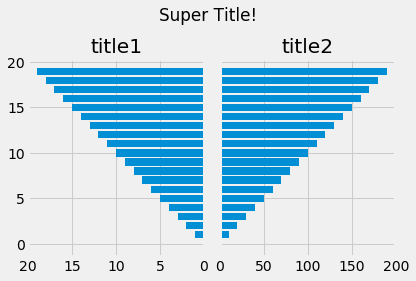

In [109]:
y = range(20)
x1 = range(20)
x2 = range(0, 200, 10)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center')  # Note: y goes in normal x pos
axes[1].barh(y, x2, align='center')
axes[0].invert_xaxis()
axes[0].set_title('title1')
axes[1].set_title('title2')
plt.suptitle('Super Title!')
fig.tight_layout()
fig.subplots_adjust(top=0.8, wspace=0.09)
plt.show()

#### Import data

In [96]:
path = "C:/Users/apark2/Documents/Year 2/Research/analysisFall2018/Grid Characterization/"
states = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'TX', 'UT', 'WA', 'WY']

coalFracTherm = pd.read_csv(path + "coalFracThermal.csv", names=states, index_col=None)
print("\n Coal Frac Therm: \n", coalFracTherm.head())
rampSeverity = pd.read_csv(path + "rampSeverity.csv", names=states, index_col=None)
print("\n Ramp Severity: \n", rampSeverity.head())
normVarGen = pd.read_csv(path + "normVarGen.csv", names=states, index_col=None)
print("\n Normalized Variance: \n", normVarGen.head())


 Coal Frac Therm: 
          AZ   CA        CO   ID        MT        NM        NV        OR   TX  \
0  0.823080  0.0  0.877470  0.0  1.000000  0.879208  0.765369  0.487160  0.0   
1  0.787104  0.0  0.851643  0.0  1.000000  0.903882  0.786161  0.411892  0.0   
2  0.723415  0.0  0.841465  0.0  0.999921  0.904459  0.743633  0.391605  0.0   
3  0.690873  0.0  0.811453  0.0  0.999564  0.905178  0.673883  0.308988  0.0   
4  0.633517  0.0  0.779406  0.0  0.999652  0.882131  0.642757  0.258175  0.0   

         UT        WA        WY  
0  0.971199  0.832517  0.993439  
1  0.970240  0.842393  0.993369  
2  0.968531  0.795497  0.996366  
3  0.978623  0.711537  0.999664  
4  0.973353  0.698925  0.999046  

 Ramp Severity: 
          AZ         CA        CO       ID        MT        NM        NV  \
0  509.4986  1723.0356  263.4466  46.1863   95.2986  192.9534  161.0849   
1  588.0493  1456.3425  320.8055  43.7479  139.0493  204.6274  161.7753   
2  629.3890  1256.3370  342.6110  45.0877  108.139

In [160]:
coalFracTherm['AZ'][0]

0.82307954

#### Plot all states for 2001

In [167]:
year = 1
colormap = cm.get_cmap('autumn_r', 12)
colors = [colormap(coalFracTherm[state][year]) for state in states]
colors

[(1.0, 0.18181818181818177, 0.0, 1.0),
 (1.0, 1.0, 0.0, 1.0),
 (1.0, 0.09090909090909094, 0.0, 1.0),
 (1.0, 1.0, 0.0, 1.0),
 (1.0, 0.0, 0.0, 1.0),
 (1.0, 0.09090909090909094, 0.0, 1.0),
 (1.0, 0.18181818181818177, 0.0, 1.0),
 (1.0, 0.6363636363636364, 0.0, 1.0),
 (1.0, 1.0, 0.0, 1.0),
 (1.0, 0.0, 0.0, 1.0),
 (1.0, 0.09090909090909094, 0.0, 1.0),
 (1.0, 0.0, 0.0, 1.0)]

In [271]:
def plotGridCharAllStates(startYear, stopYear, verticalAxis, Laxis, Raxis):
    # Returns list of images for all states, over the given range of years
    # Inputs: 17 X 12 pd DataFrames containing metrics for all states, all years
    # verticalAxis: Data for vertical axis. Better if normalized to [0, 1]
    # Laxis: Data for left axis
    # Raxis: Data for right axis
    images = []
    for year in range(startYear, stopYear + 1):
        # get data
        getVert = verticalAxis.iloc[year - 2001]
        getLaxis = Laxis.iloc[year - 2001]
        getRaxis = Raxis.iloc[year - 2001]
        fig, axes = plt.subplots(ncols=2, sharey=True)
        # define colormap
        colormap = cm.get_cmap('autumn_r', 12)
        colors = [colormap(coalFracTherm[state][year - 2001]) for state in states]
        # Note: y goes in normal x pos
        axes[0].barh(getVert, getLaxis, 0.05, align='center', color=colors, edgecolor='k')
        axes[0].set_ylim([0, 1])
        axes[1].barh(getVert, getRaxis, 0.05, align='center', color=colors, edgecolor='k')
        axes[1].set_ylim([-0.05, 1.05])
        # Note: will have to change labels when changing metrics!
        axes[0].set_xlabel('Ramp Severity [MW/hr]')
        axes[1].set_xlabel('Normalized Variance [MWh^2/MWh]')
        axes[0].invert_xaxis()
        axes[0].yaxis.tick_right()
        # figure positioning
        fig.set_figheight(10)
        fig.set_figwidth(10)
        fig.tight_layout()
        fig.subplots_adjust(top=0.9, wspace=0.09)
        # add labels
        rects = axes[1].patches
        labels = [state for state in range(len(states))]
        total = sum(j.get_width() for j in axes[1].patches)
        for i in range(len(rects)):  # get_width pulls left or right; get_y pushes up or down
            axes[1].text(rects[i].get_width() + 10, rects[i].get_y() + 0.015, states[i], fontsize=15, color='k')
        # add title
        plt.suptitle('Western Interconnection: ' + str(year), fontsize=30)
#         plt.savefig('GridChar_AllStates_' + str(year))
#         images.append([fig])
#         plt.show()
    return images

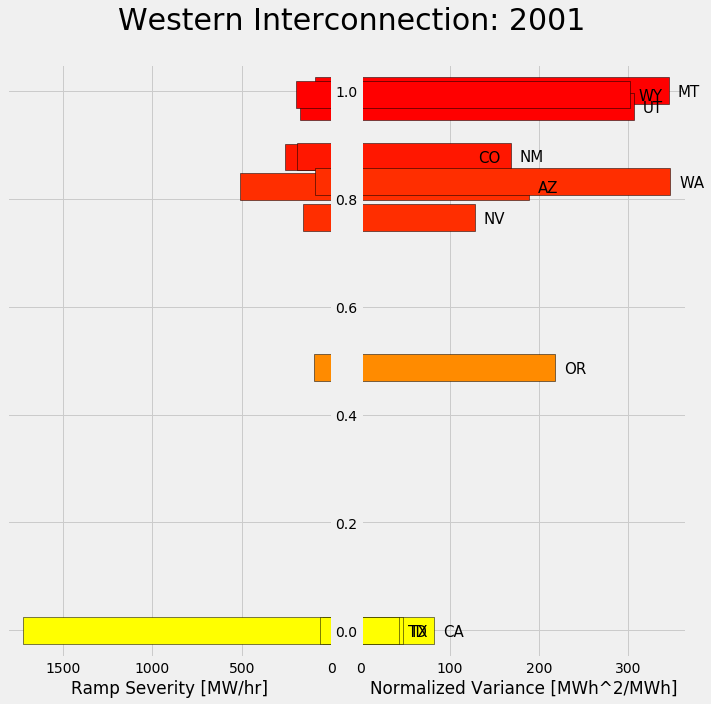

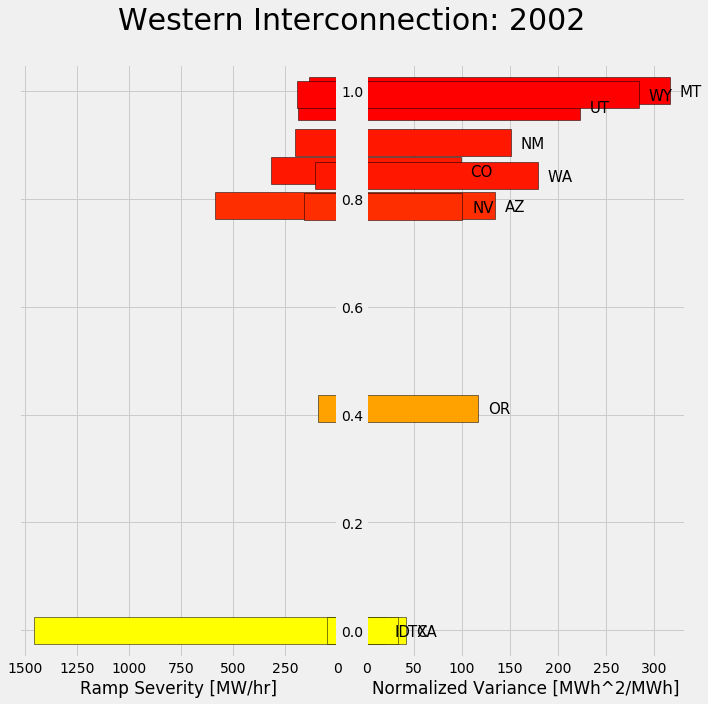

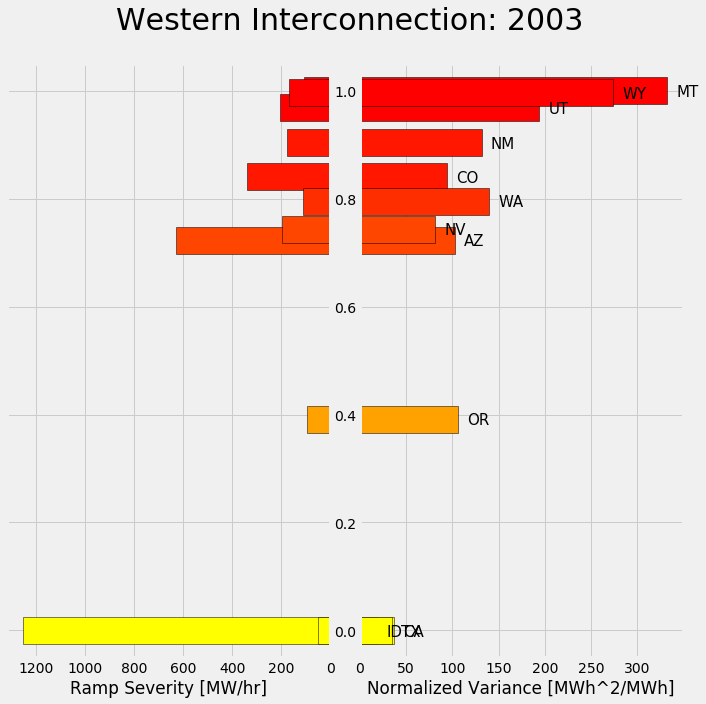

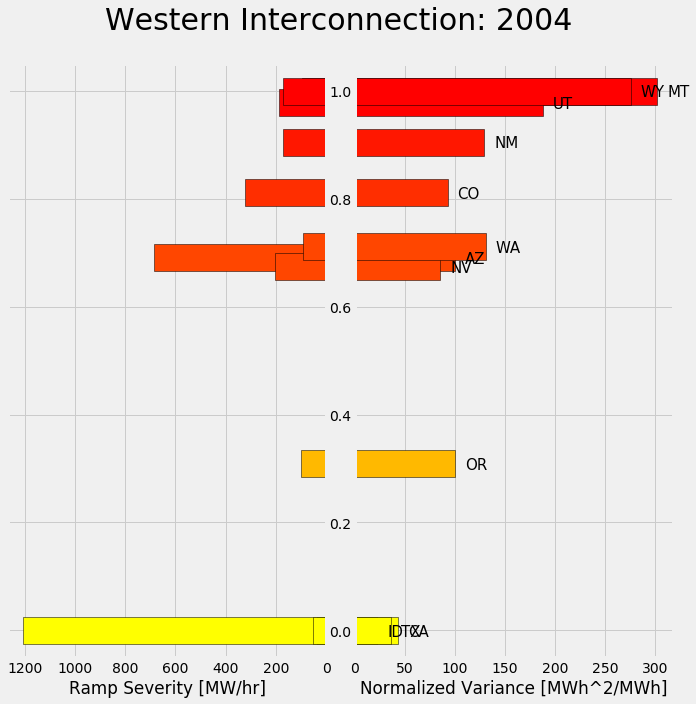

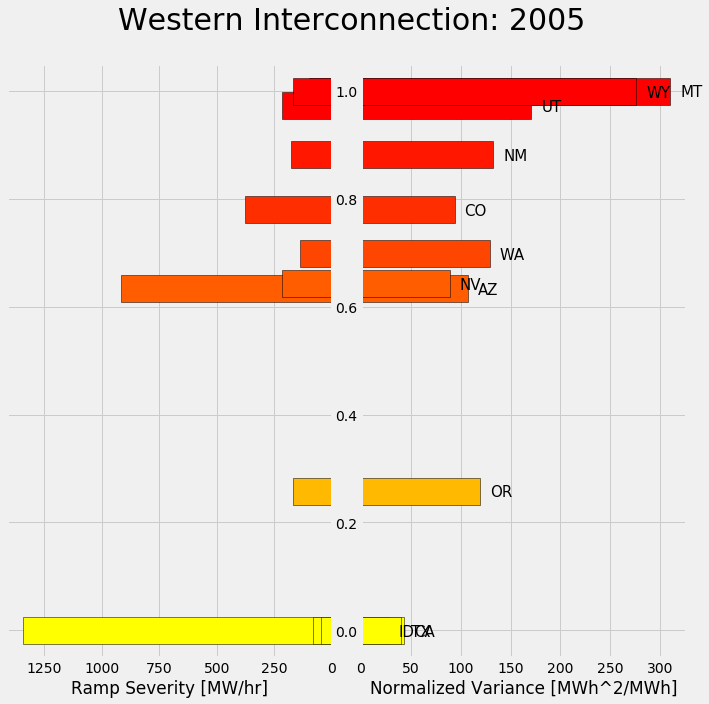

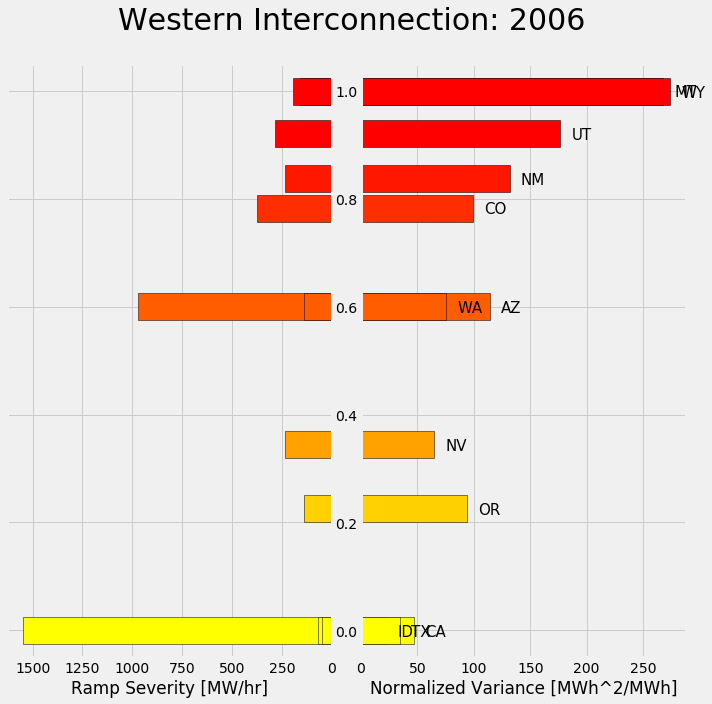

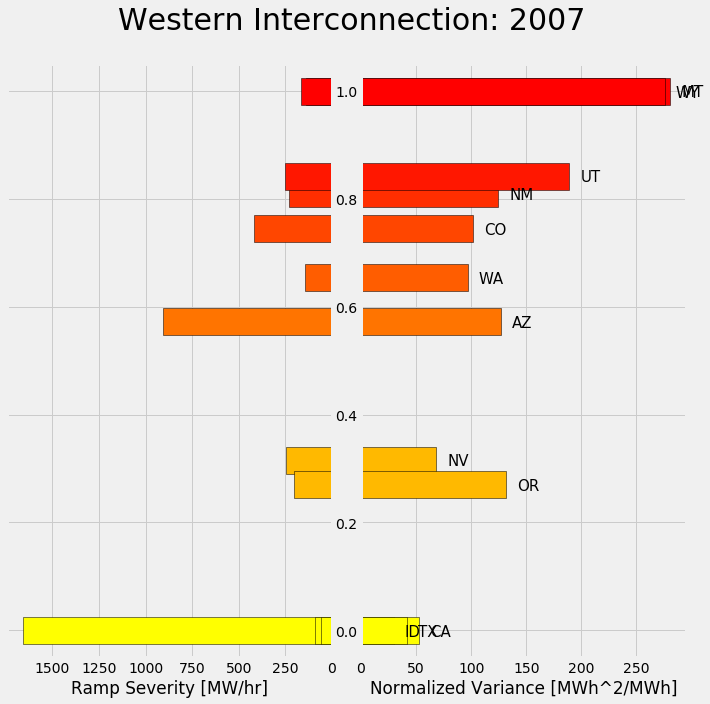

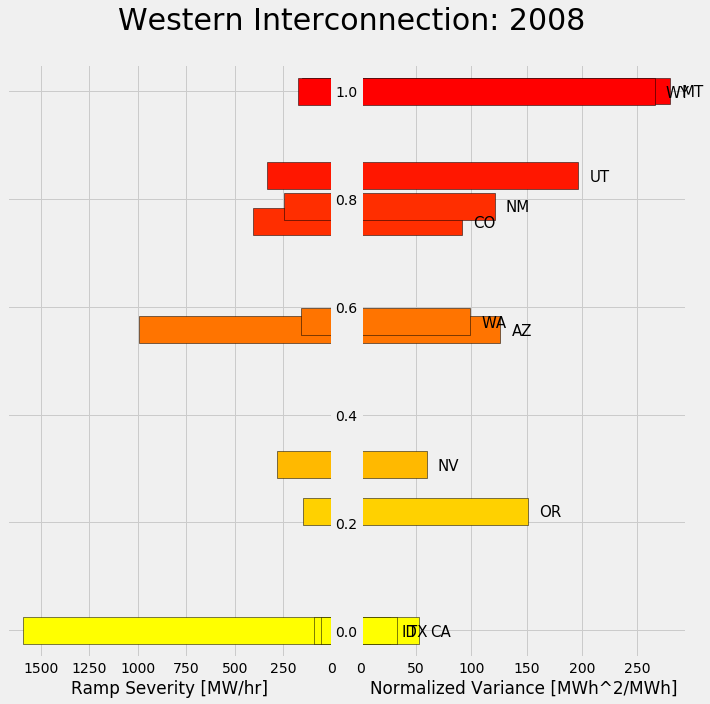

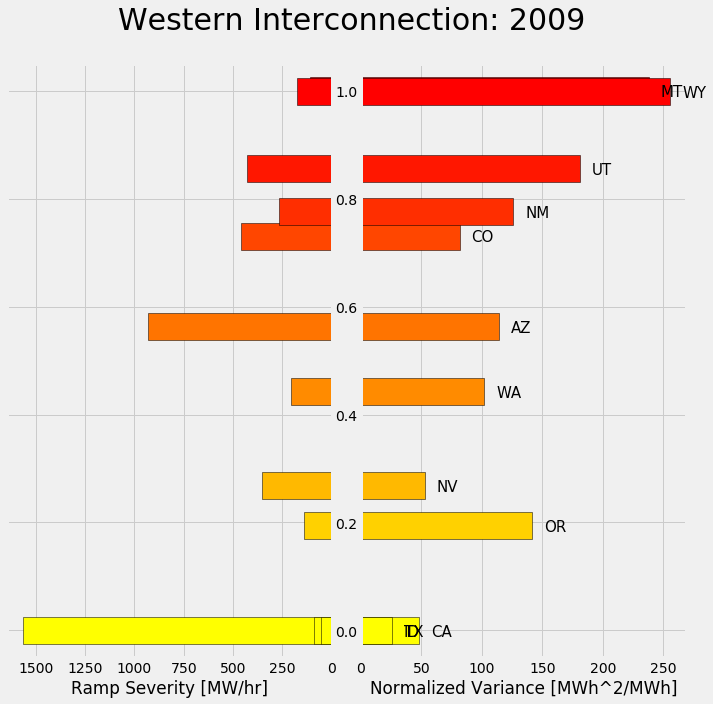

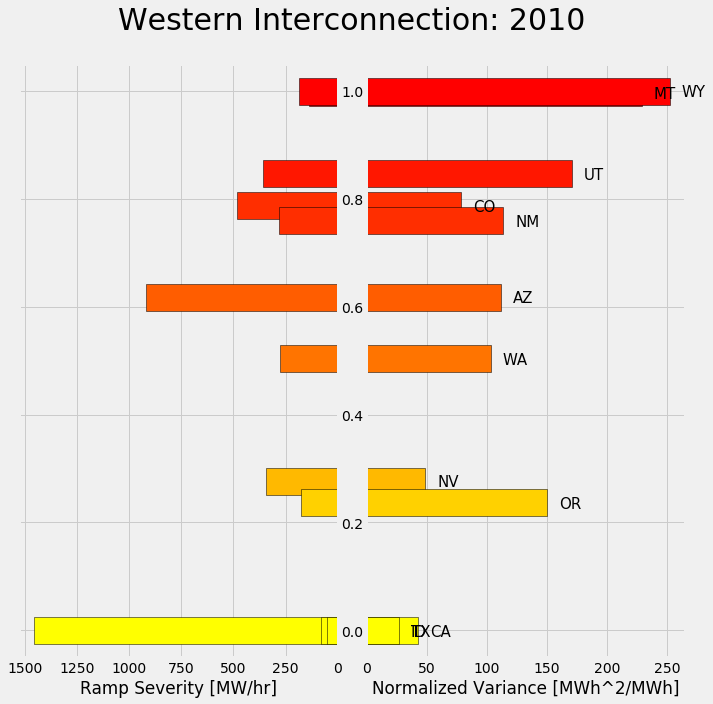

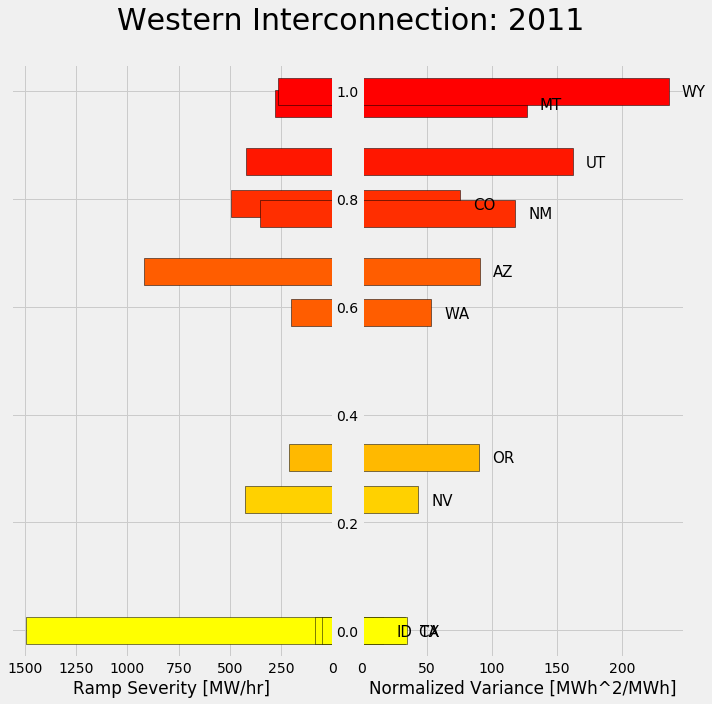

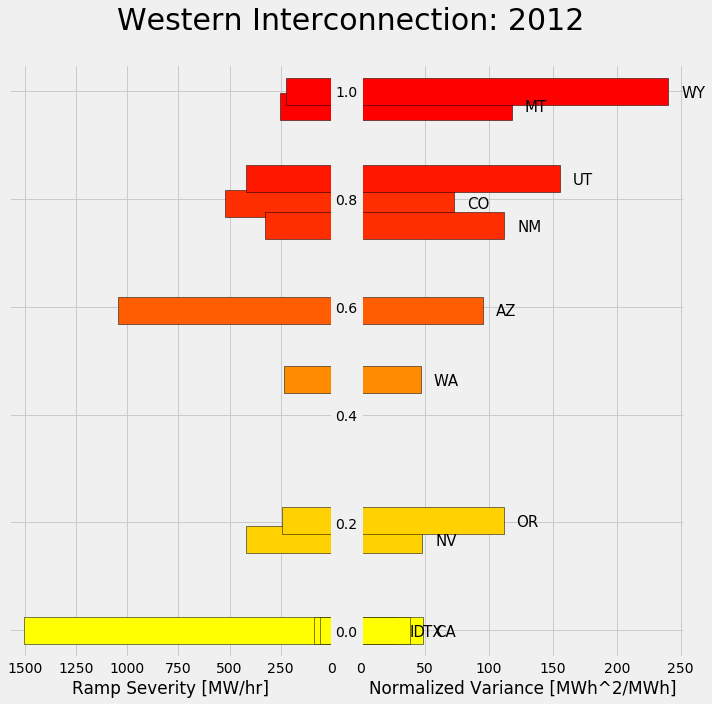

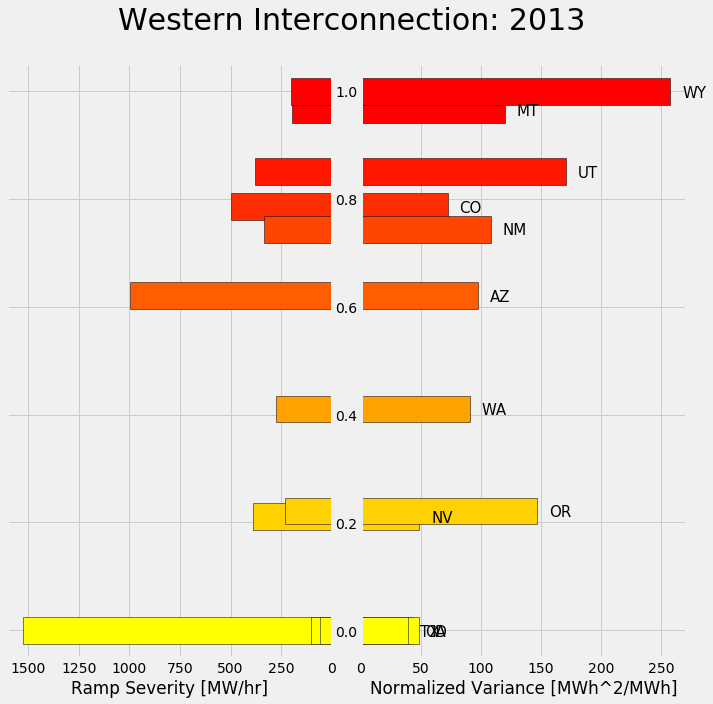

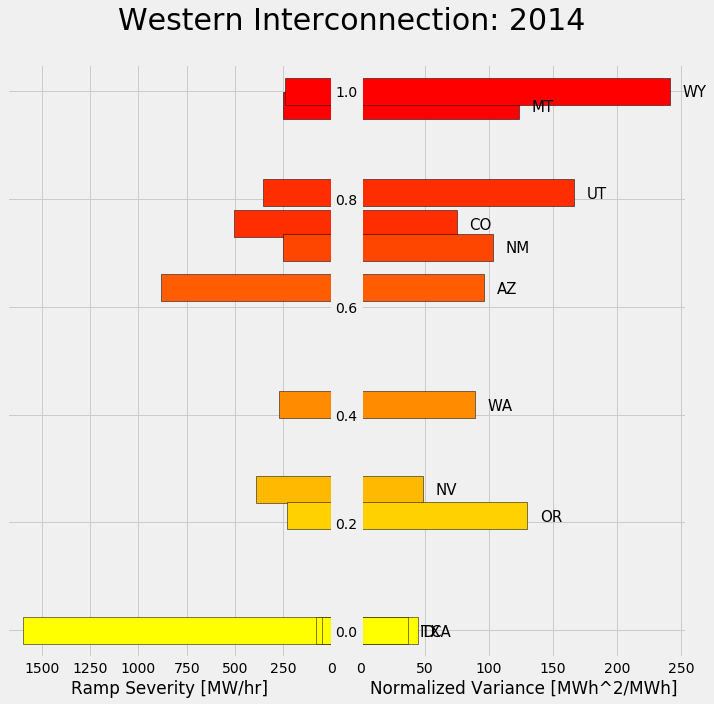

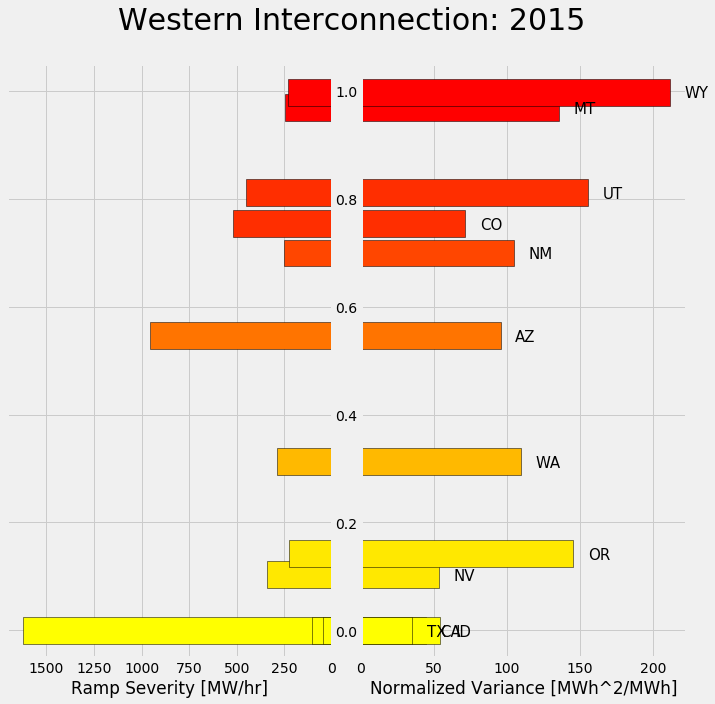

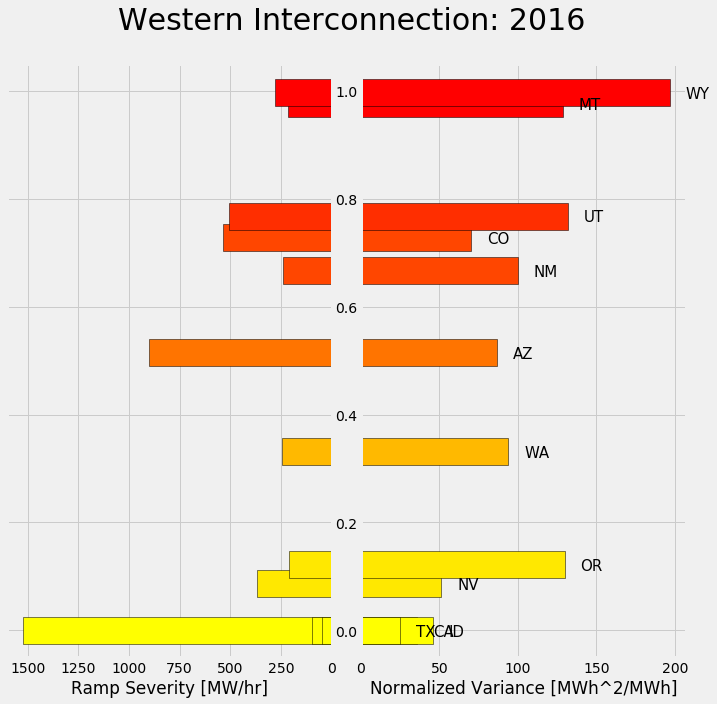

In [250]:
images = plotGridCharAllStates(2001, 2016, coalFracTherm, rampSeverity, normVarGen)

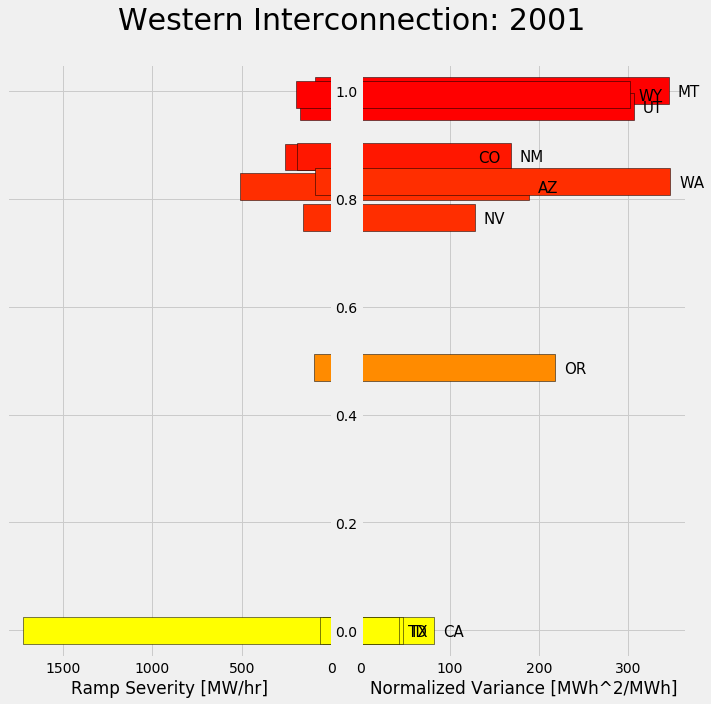

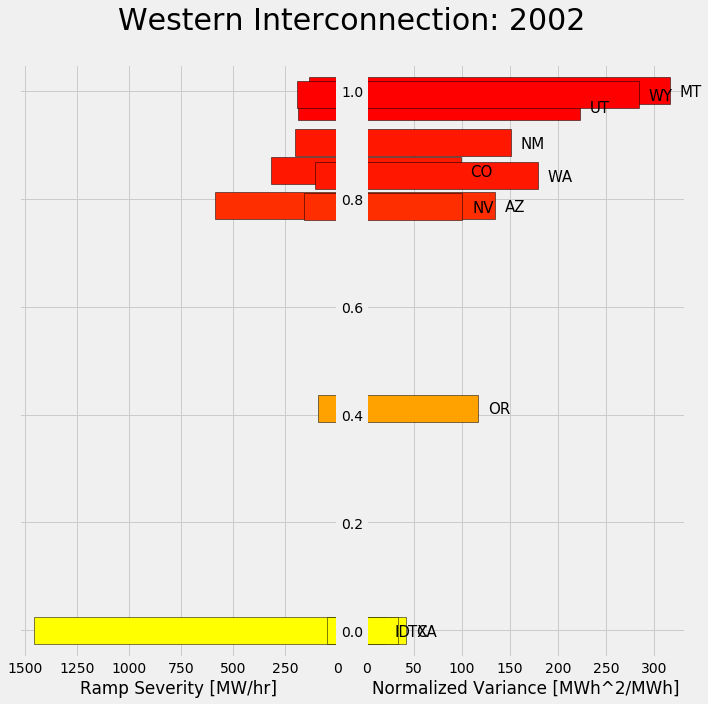

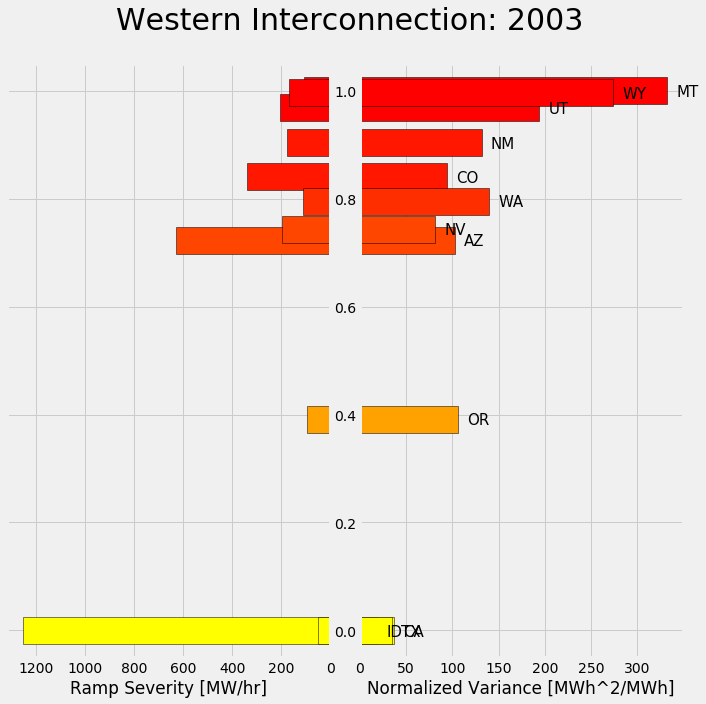

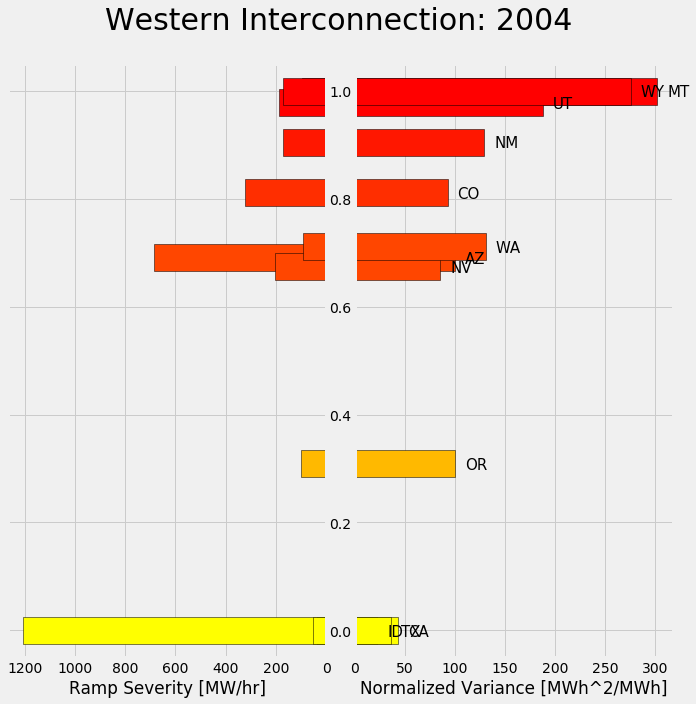

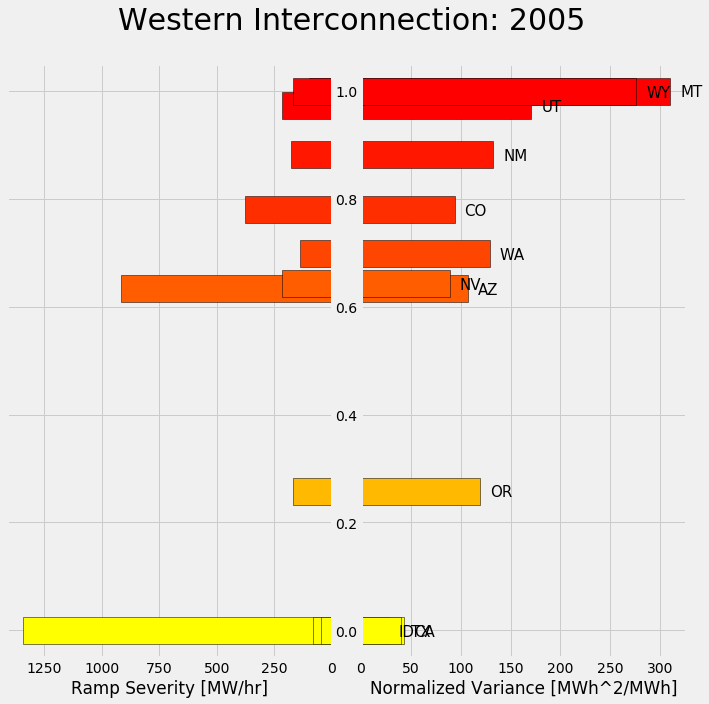

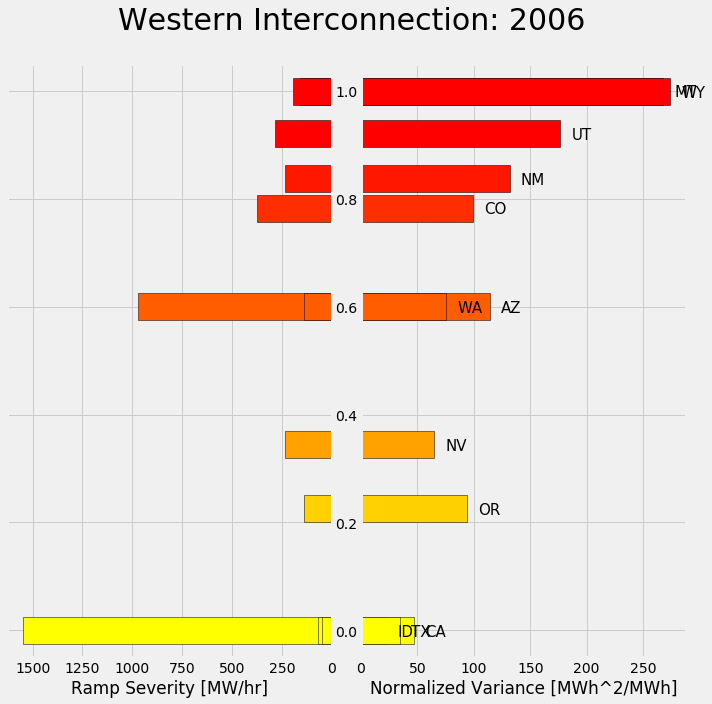

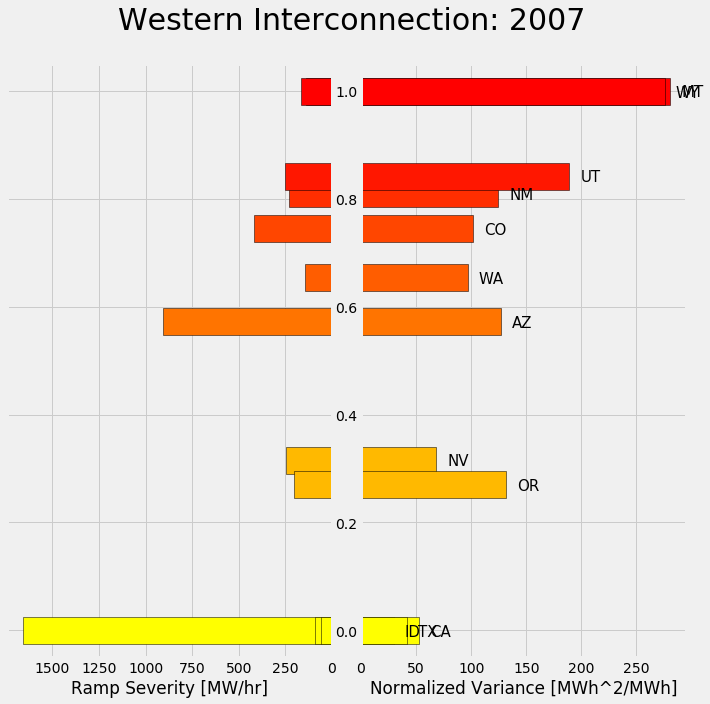

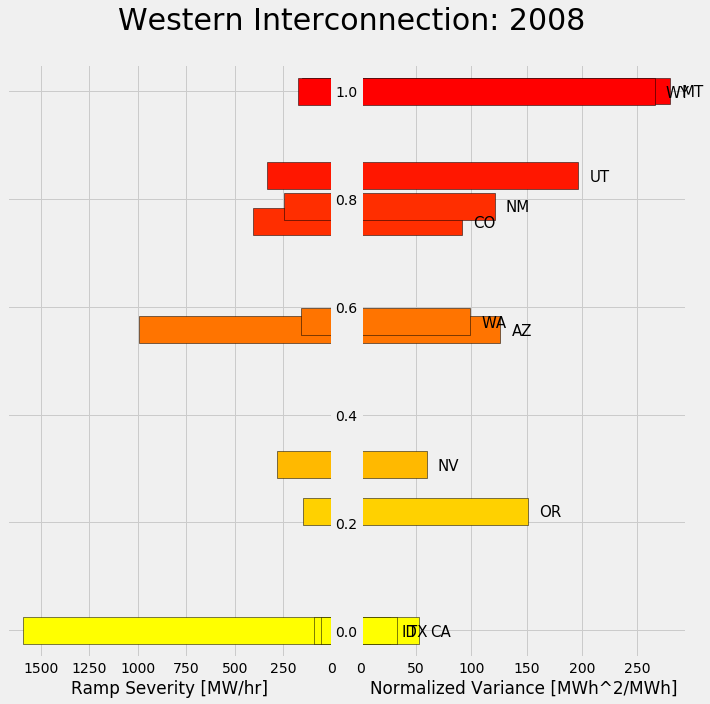

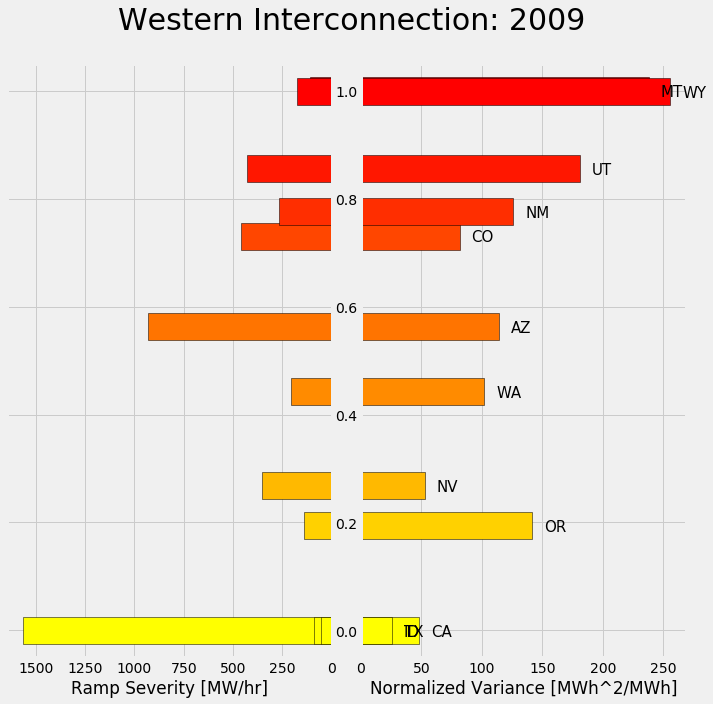

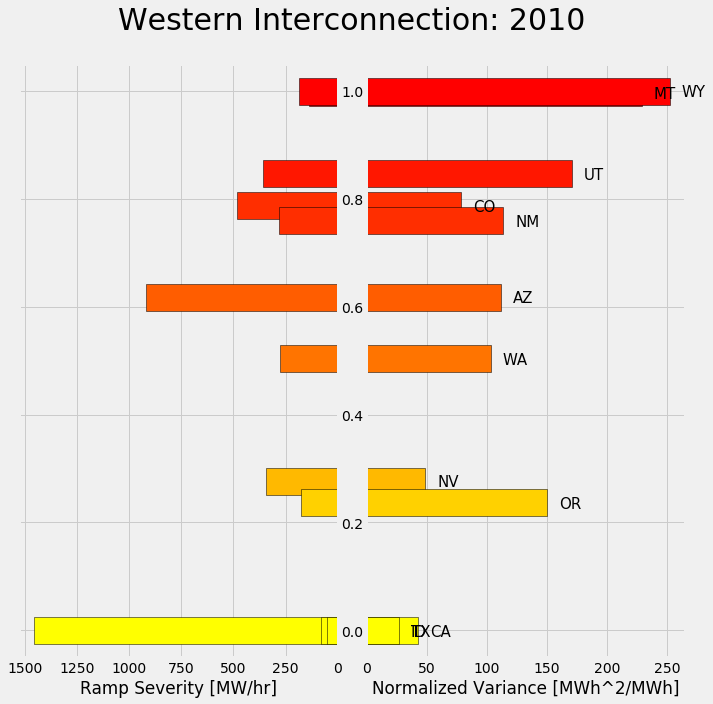

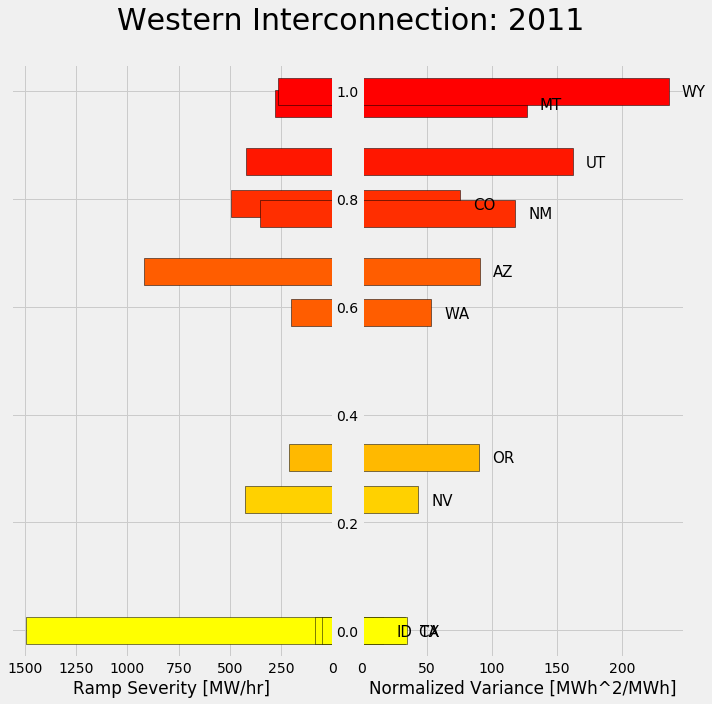

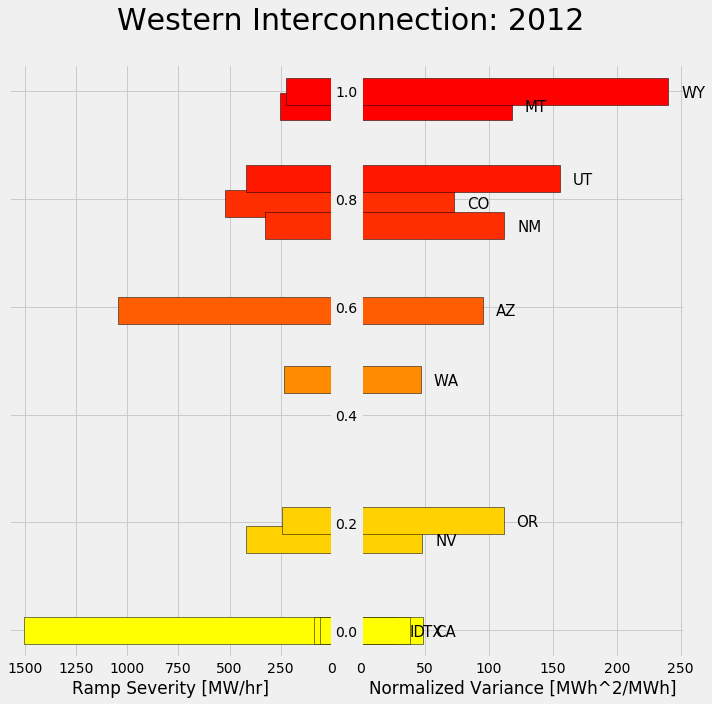

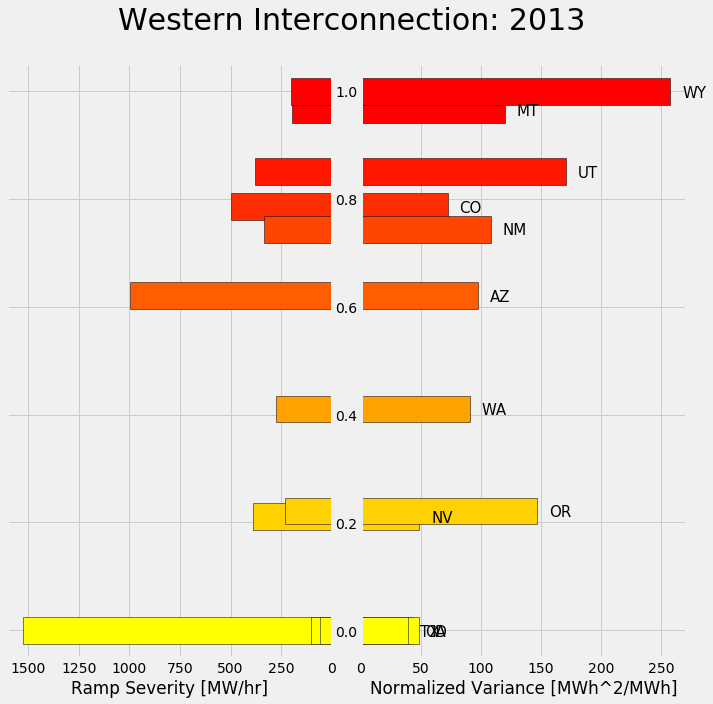

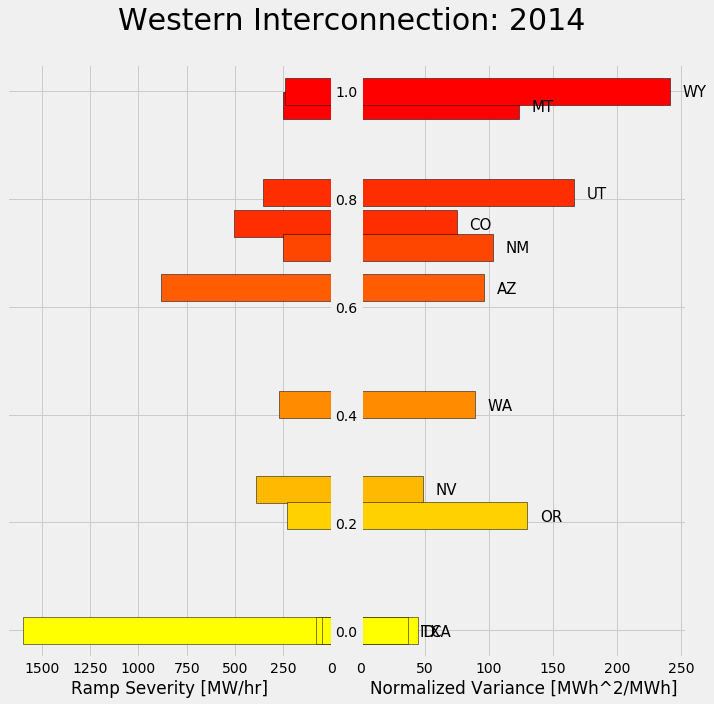

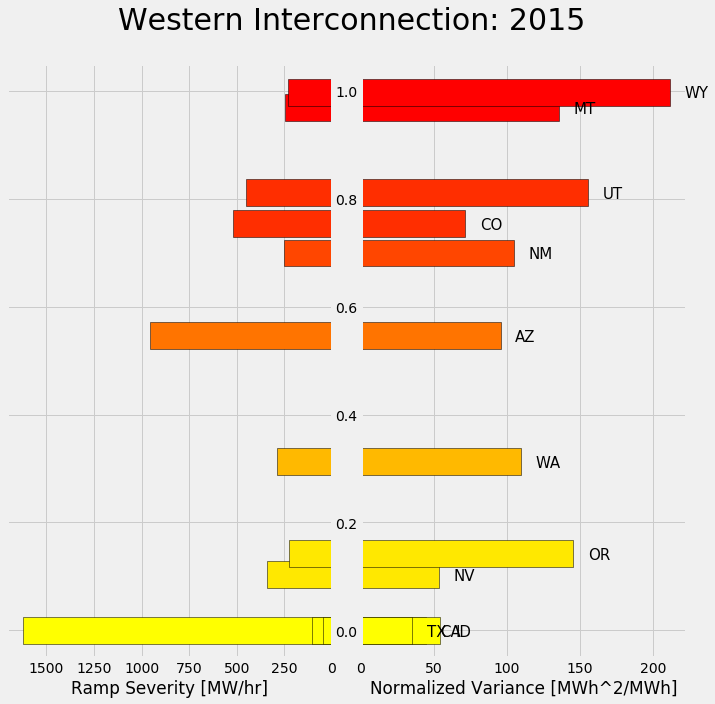

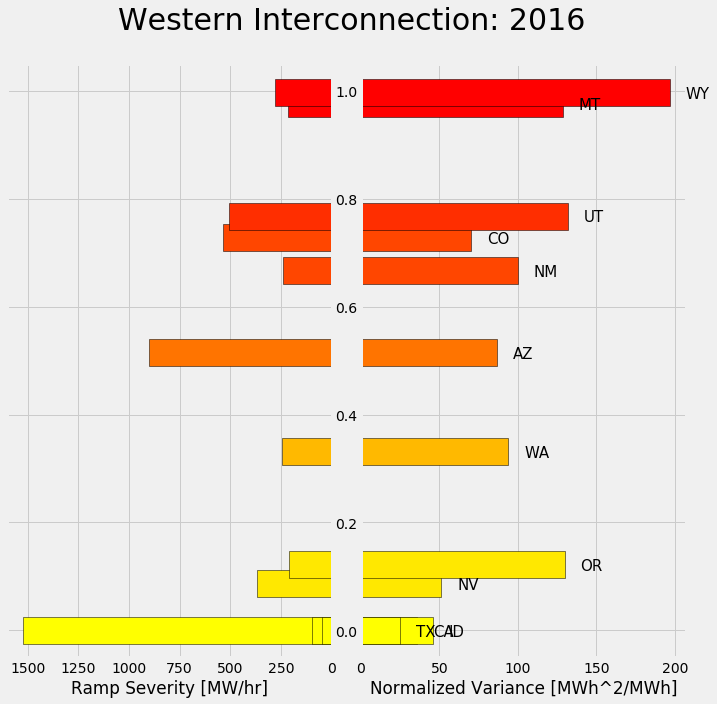

In [246]:
images = plotGridCharAllStates(2001, 2016)

In [243]:
# Broken

gifName = 'allStatesGridChar_V1'
dataDir = 'C:/Users/apark2/Documents/Year 2/Research/analysisFall2018/Grid Characterization/'
images = []
with open(dataDir + 'image_list.txt', 'r') as file:
    for line in file:
        images.append(line[:-1])
# print(images)
for filename in images:
    images.append(imageio.imread(filename))
imageio.mimsave(dataDir + gifName + '.gif', images)

OSError: Cannot understand given URI: Image([[[240, 240, 240, 255],
        [240, 240, 240, 255....

In [229]:
gifName = 'allStatesGridChar_V1'
images = glob.glob('*.png') # Get all the pngs in the current directory
with open('image_list.txt', 'w') as file:
    for item in images:
        file.write('%s\n' % item)
dataDir = 'C:/Users/apark2/Documents/Year 2/Research/analysisFall2018/Grid Characterization/'
os.chdir(dataDir)
os.system('magick @image_list.txt {}.gif'.format(gifName))

1

In [225]:
images

['GridChar_AllStates_2001.png',
 'GridChar_AllStates_2002.png',
 'GridChar_AllStates_2003.png',
 'GridChar_AllStates_2004.png',
 'GridChar_AllStates_2005.png',
 'GridChar_AllStates_2006.png',
 'GridChar_AllStates_2007.png',
 'GridChar_AllStates_2008.png',
 'GridChar_AllStates_2009.png',
 'GridChar_AllStates_2010.png',
 'GridChar_AllStates_2011.png',
 'GridChar_AllStates_2012.png',
 'GridChar_AllStates_2013.png',
 'GridChar_AllStates_2014.png',
 'GridChar_AllStates_2015.png',
 'GridChar_AllStates_2016.png']

Traceback (most recent call last):
  File "C:\Users\apark2\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\apark2\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\matplotlib\animation.py", line 999, in _start
    self._init_draw()
  File "C:\Users\apark2\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\matplotlib\animation.py", line 1519, in _init_draw
    for artist in f:
TypeError: 'Figure' object is not iterable


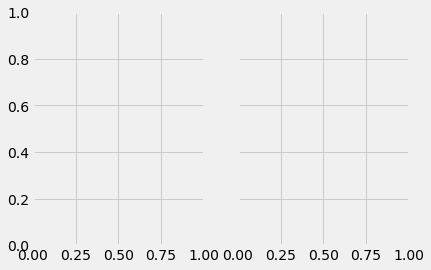

In [213]:
fig, axes = plt.subplots(ncols=2, sharey=True)
ani = animation.ArtistAnimation(fig, images, interval=50, blit=True,
                                repeat_delay=1000)
plt.show()

In [201]:
type(images[0])

matplotlib.figure.Figure

In [62]:
percents = np.linspace(0, 100, 11)
ticks = np.apply_along_axis(str, 0, percents)

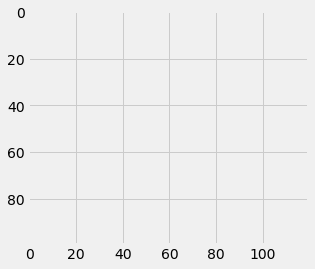

In [214]:
fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

## V2:
    1. % thermal generation from coal
    2. 3hr Ramp severity
    3. Average(2-norm(Day-on-day change))

In [322]:
def plotGridCharAllStatesV2(startYear, stopYear, states, verticalAxis, Laxis, Raxis):
    # Returns list of images for all states, over the given range of years
    # Inputs: 17 X 12 pd DataFrames containing metrics for states to be plotted, for all years
    # states: list of strings (uppercase) of states to plot
    # verticalAxis: Data for vertical axis. Better if normalized to [0, 1]
    # Laxis: Data for left axis
    # Raxis: Data for right axis
    
        # Returns list of images for all states. Axes:
    #     1. % thermal generation from coal
    #     2. 3hr Ramp severity
    #     3. Average(2-norm(Day-on-day change))

    images = []
    for year in range(startYear, stopYear + 1):
        # get data
        getVert = verticalAxis.iloc[year - 2001]
        getLaxis = Laxis.iloc[year - 2001]
        getRaxis = Raxis.iloc[year - 2001]
        fig, axes = plt.subplots(ncols=2, sharey=True)
        # define colormap
        colormap = cm.get_cmap('autumn_r', 11)
        colors = [colormap(coalFracTherm[state][year - 2001]) for state in states]
        # Note: y goes in normal x pos
        axes[0].barh(getVert, getLaxis, 0.05, align='center', color=colors, edgecolor='k')
        axes[0].set_ylim([0, 1])
        axes[1].barh(getVert, getRaxis, 0.05, align='center', color=colors, edgecolor='k')
        axes[1].set_ylim([-0.05, 1.05])
        # Note: will have to change labels when changing metrics!
        axes[0].set_xlabel('3 Hr Ramp Sev [MW/3hr]')
        axes[0].set_xlim([0, 15000])
        axes[1].set_xlabel('Day-to-Day Change [MW]')
        axes[1].set_xlim([0, 5800])
        axes[0].invert_xaxis()
        axes[0].yaxis.tick_right()
        # figure positioning
        fig.set_figheight(10)
        fig.set_figwidth(10)
        fig.tight_layout()
        fig.subplots_adjust(top=0.9, wspace=0.09)
        # add labels
        rects = axes[1].patches
        labels = [state for state in range(len(states))]
        total = sum(j.get_width() for j in axes[1].patches)
        for i in range(len(rects)):  # get_width pulls left or right; get_y pushes up or down
            axes[1].text(rects[i].get_width() + 10, rects[i].get_y() + 0.015, states[i], fontsize=15, color='k')
        # add title
        plt.suptitle('Western Interconnection: ' + str(year), fontsize=30)
        plt.savefig('C:/Users/apark2/Documents/Year 2/Research/analysisFall2018/Grid Characterization/GridChar_V2/GridChar_V2_AllStates_' + str(year))
#         images.append([fig])
#         plt.show()
    return images

In [323]:
# Import new data
path = "C:/Users/apark2/Documents/Year 2/Research/analysisFall2018/Grid Characterization/"
states = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'TX', 'UT', 'WA', 'WY']

# EXCLUDE TX
coalFracTherm = pd.read_csv(path + "coalFracThermal.csv", names=states, index_col=None).drop(columns=['TX'])
print("\n Coal Frac Therm: \n", coalFracTherm.head())
rampSev_3hr = pd.read_csv(path + "ramp_3hr_sev.csv", names=states, index_col=None).drop(columns=['TX'])
print("\n 3 Hour Ramp Severity: \n", rampSev_3hr.head())
day2day = pd.read_csv(path + "day2day.csv", names=states, index_col=None).drop(columns=['TX'])
print("\n Average of 2-norm of day-to-day abs difference: \n", day2day.head())


 Coal Frac Therm: 
          AZ   CA        CO   ID        MT        NM        NV        OR  \
0  0.823080  0.0  0.877470  0.0  1.000000  0.879208  0.765369  0.487160   
1  0.787104  0.0  0.851643  0.0  1.000000  0.903882  0.786161  0.411892   
2  0.723415  0.0  0.841465  0.0  0.999921  0.904459  0.743633  0.391605   
3  0.690873  0.0  0.811453  0.0  0.999564  0.905178  0.673883  0.308988   
4  0.633517  0.0  0.779406  0.0  0.999652  0.882131  0.642757  0.258175   

         UT        WA        WY  
0  0.971199  0.832517  0.993439  
1  0.970240  0.842393  0.993369  
2  0.968531  0.795497  0.996366  
3  0.978623  0.711537  0.999664  
4  0.973353  0.698925  0.999046  

 3 Hour Ramp Severity: 
             AZ            CA           CO          ID           MT  \
0  2759.904110   9092.860274  1583.219178  280.202740  1283.375342   
1  3647.284932  10609.835616  1948.778082  258.619178  1737.432877   
2  4869.345205  10629.810959  2611.816438  258.860274  1439.101370   
3  4652.732240   9

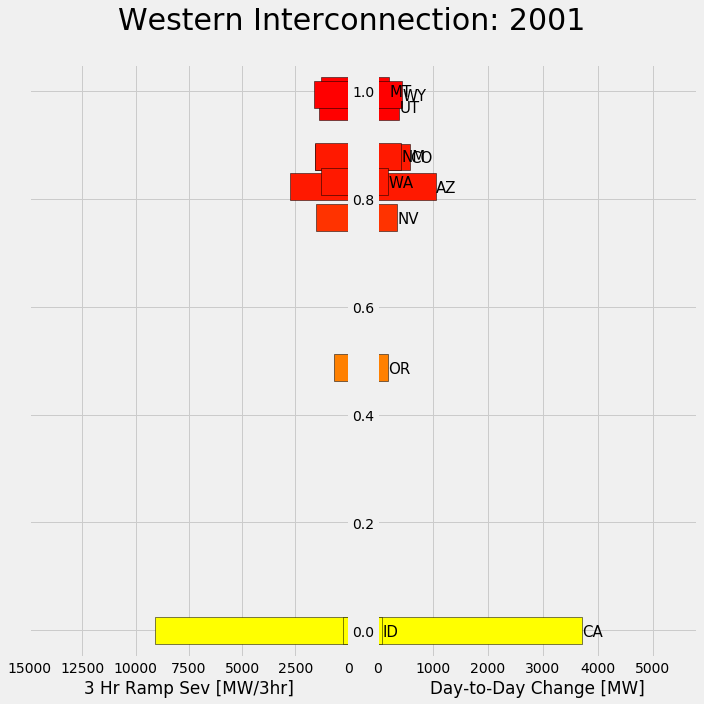

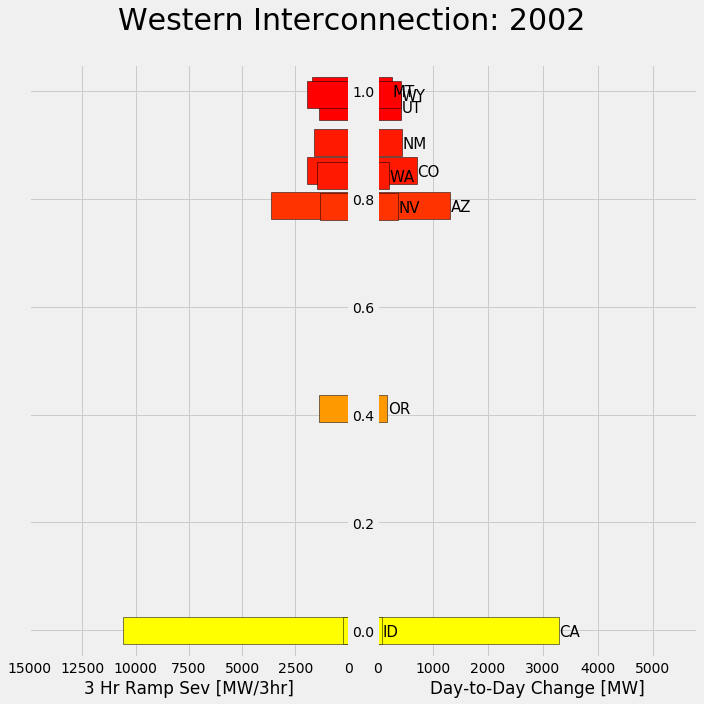

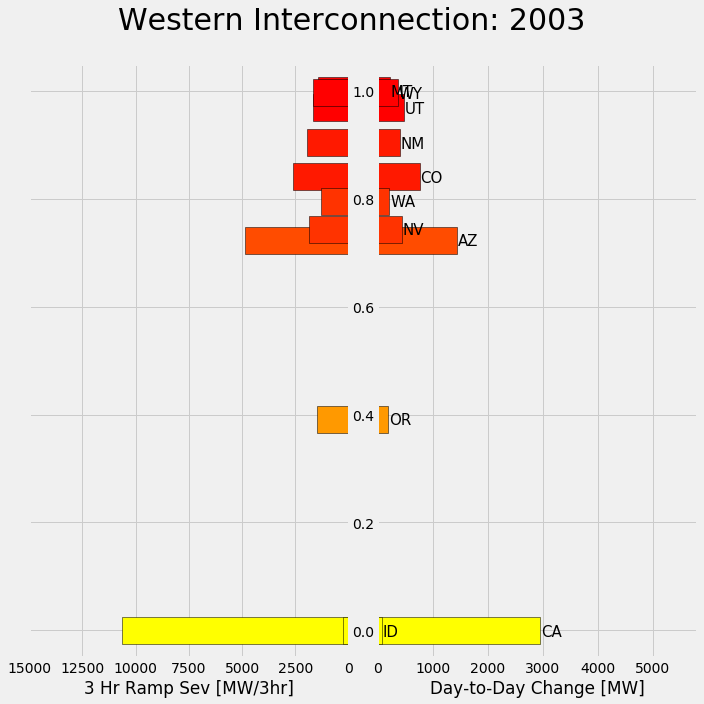

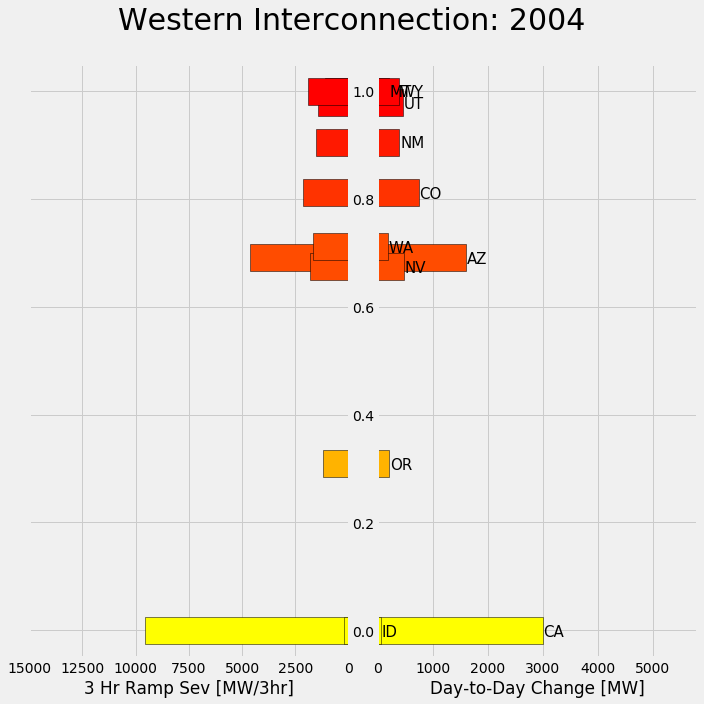

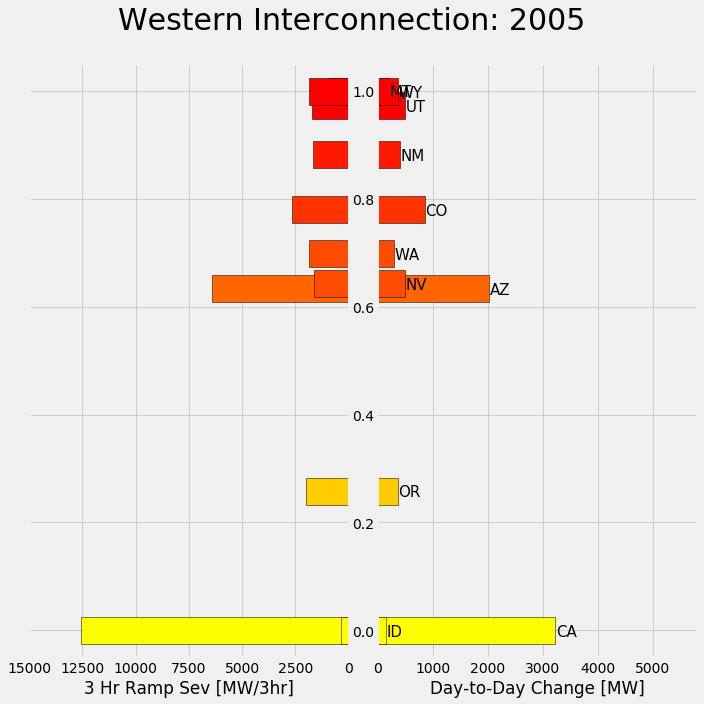

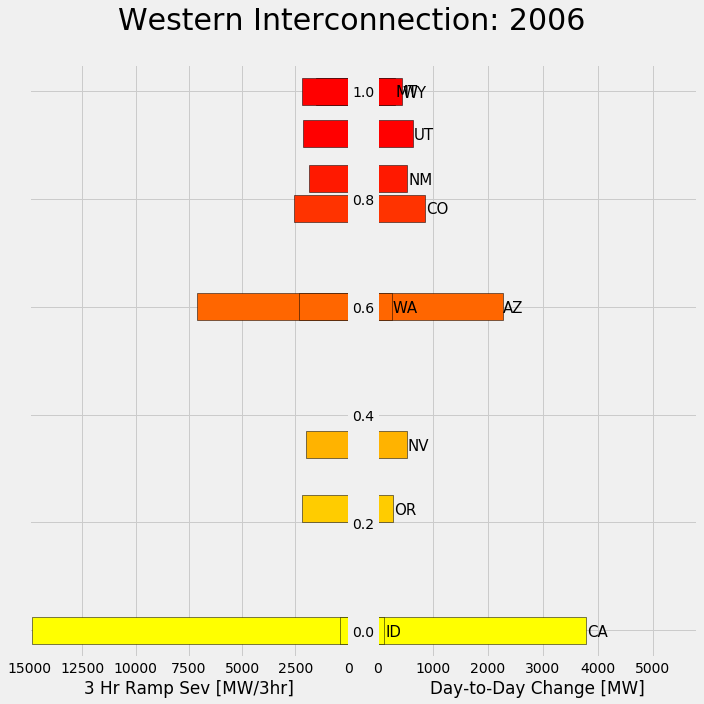

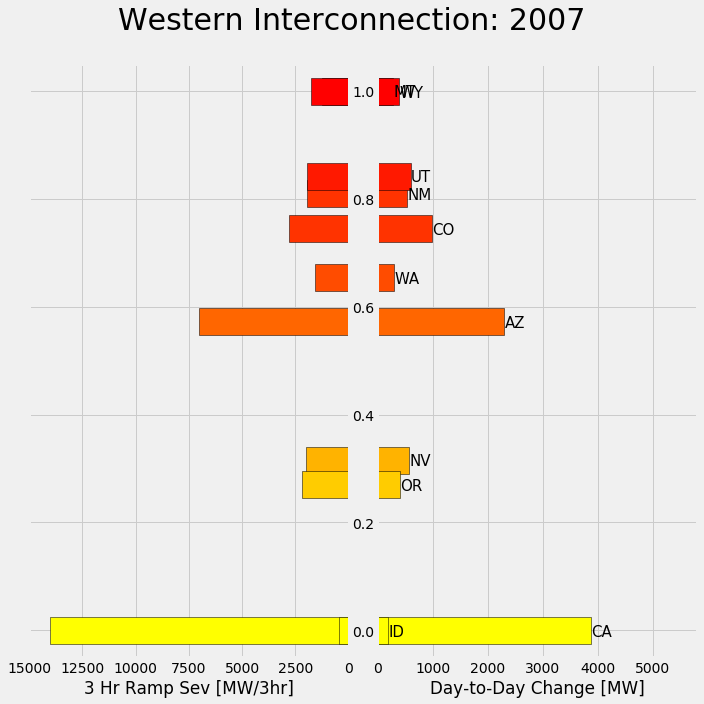

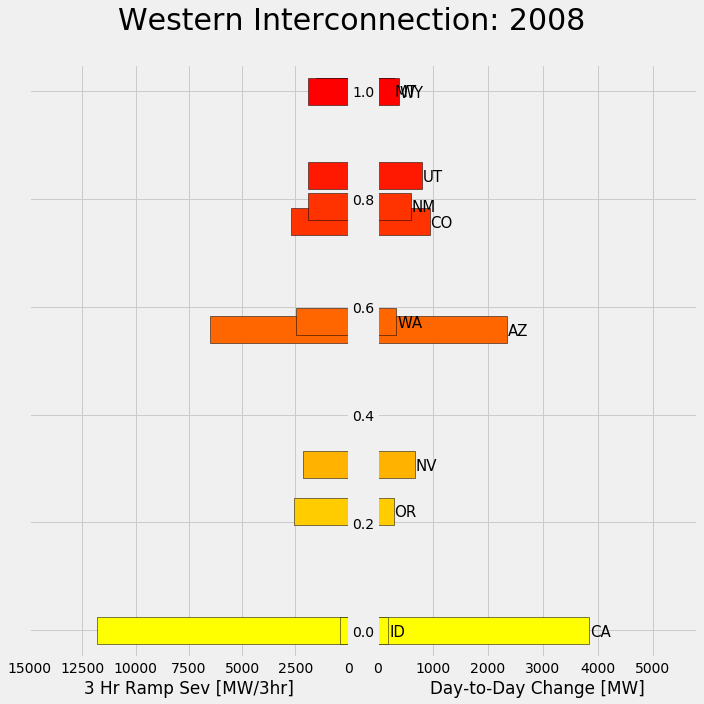

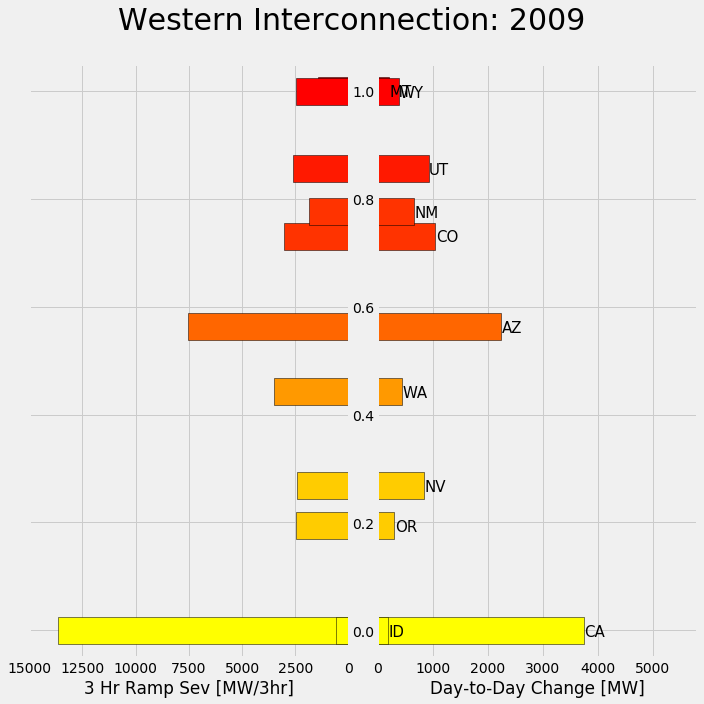

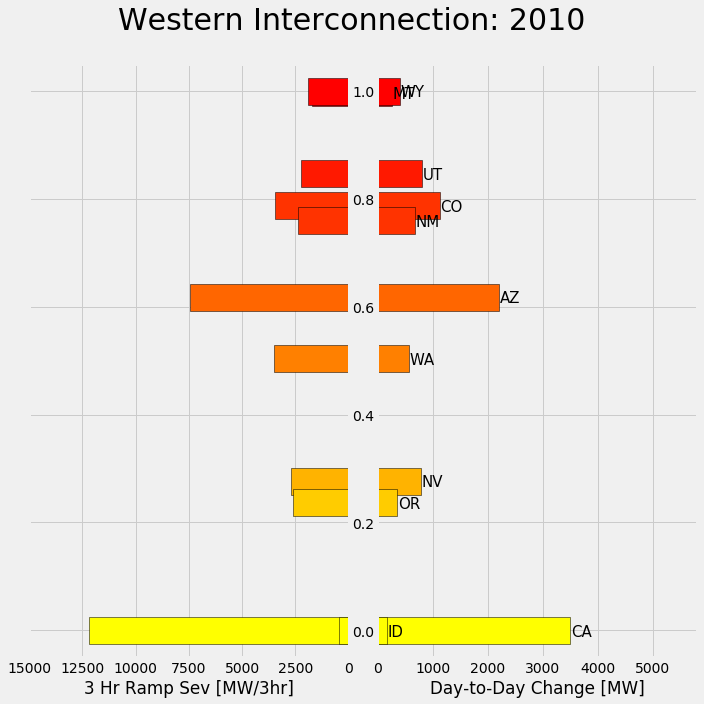

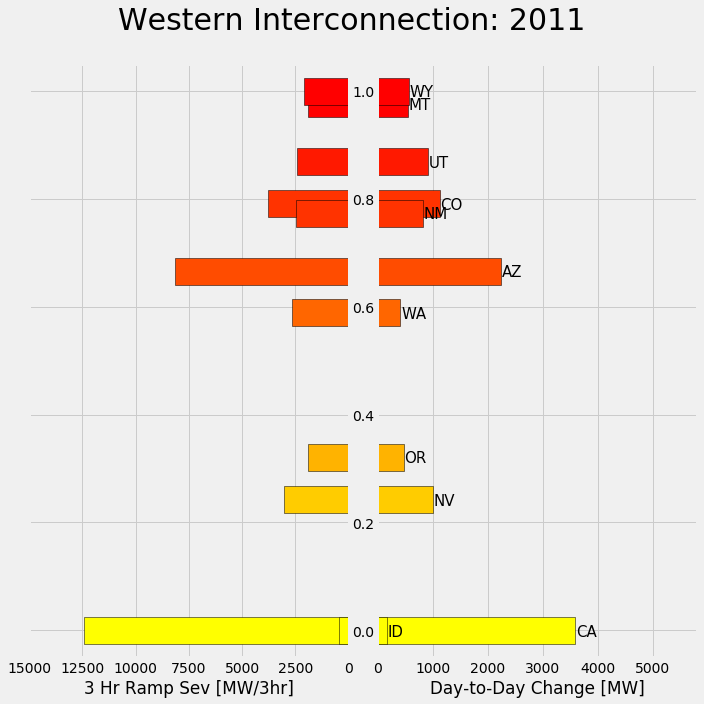

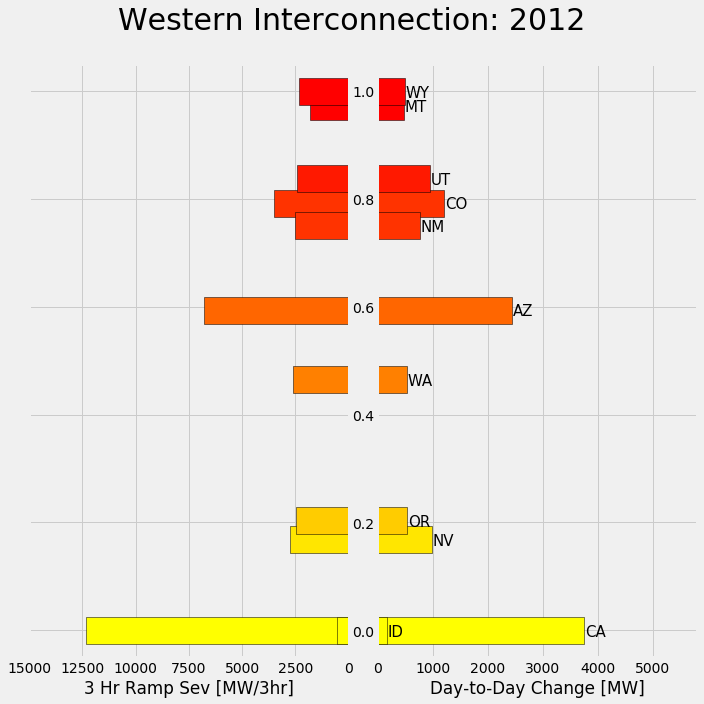

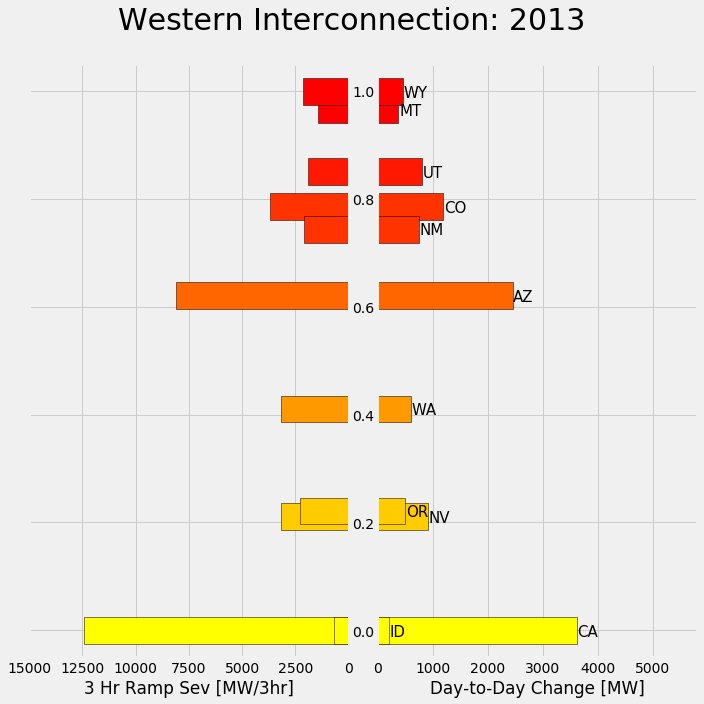

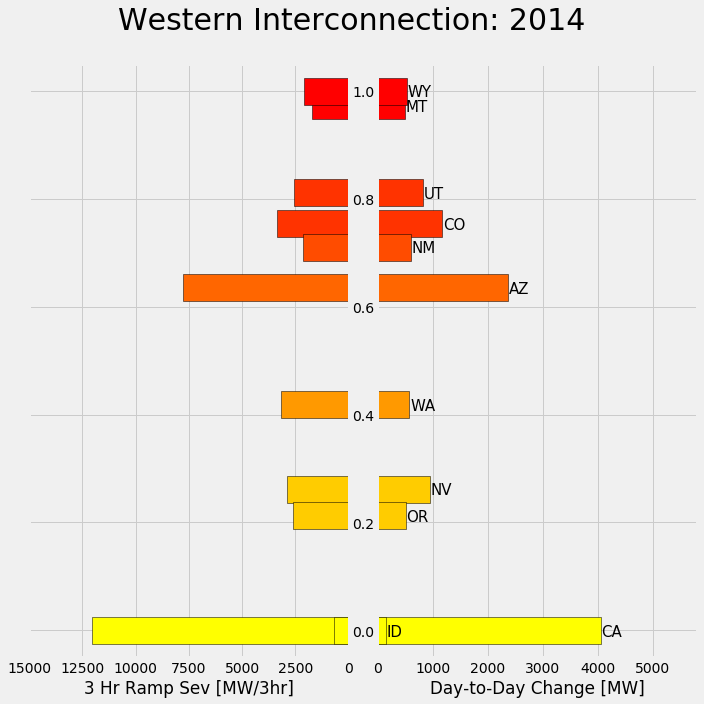

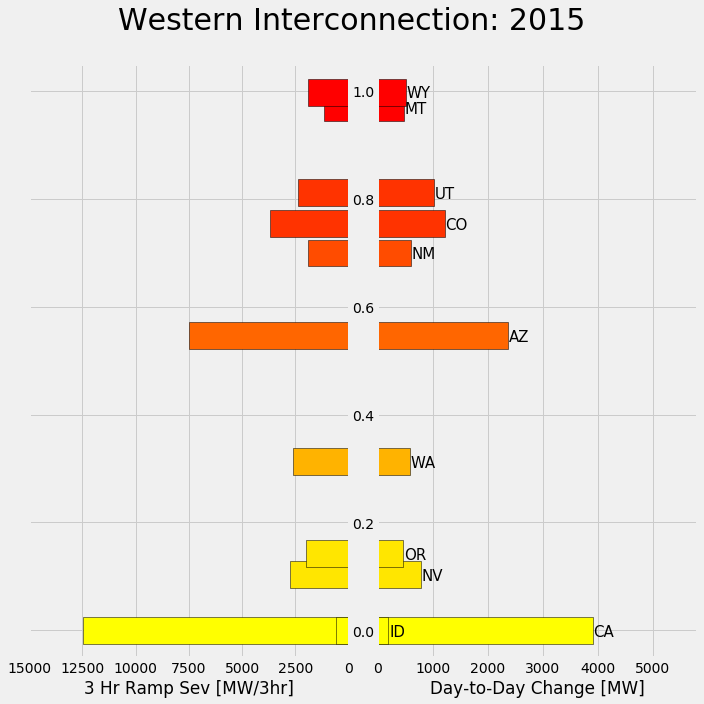

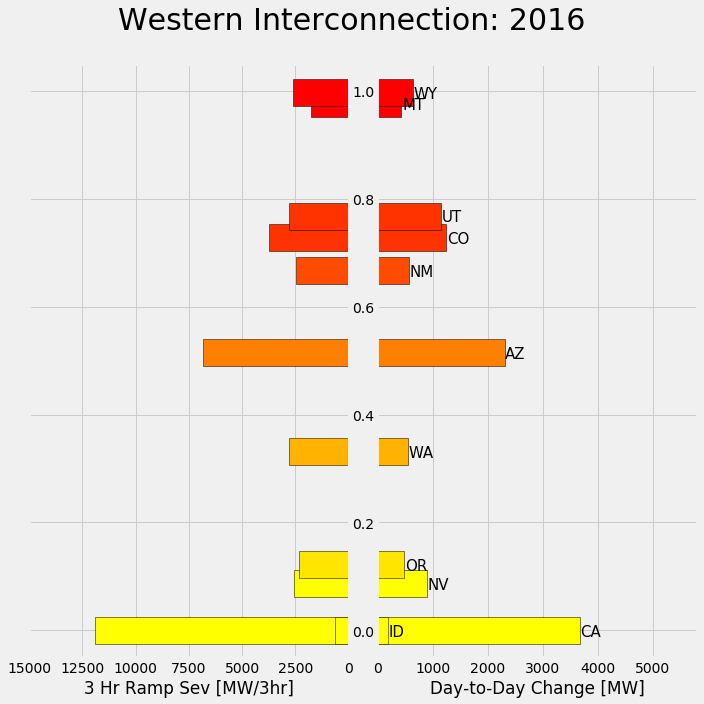

In [324]:
statesToPlot = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
images = plotGridCharAllStatesV2(2001, 2016, statesToPlot, coalFracTherm, rampSev_3hr, day2day)

#### Extra formatting